In [15]:
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

In [1]:
demofolder = '../../mid/mid-demo/'
spikefile = '11101_1.isk'
moviefile = 'walk1_ieee_128x128x16384.raw'

In [2]:
with open(demofolder+spikefile, 'r') as f:
    nframes = 0
    nspikes = 0
    for line in f:
        nframes += 1
        try:
            nspikes += int(line.rstrip())
        except ValueError:
            print("Can't read this line as an int. Guessing zero.")
print(nframes)
print(nspikes)

Can't read this line as an int.
Can't read this line as an int.
16384
20910


In [4]:
with open(demofolder+moviefile,'rb') as f:
    print(type(f))
    count = 0
    bigcount = 0
    for thing in f:
        print(len(thing))
        count += 1
        bigcount += len(thing)
print(bigcount)
print(count)

<class '_io.BufferedReader'>
123532465
604940
4893040
16025108
82979045
31964868
894
3306
48
8431742
268435456
10


In [6]:
print(thing[1])

57


In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.ioff()

In [26]:
(128*128*16384) == bigcount

True

In [47]:
with open(demofolder+moviefile,'rb') as f:
    frame = f.read(128*128)
flframe = np.zeros(len(frame))
for pix in range(len(frame)):
    flframe[pix] = float(frame[pix])
plt.imshow(flframe.reshape((128,128)),cmap='gray')

In [ ]:
with open(demofolder+moviefile,'rb') as f:
    while True:
        frame = f.read(128*128)
        if not frame:
            break
        flframe = np.zeros(len(frame))
        for pix in range(len(frame)):
            flframe[pix] = float(frame[pix])
        plt.imshow(flframe.reshape((128,128)),cmap='gray')
        plt.show()

In [12]:
plt.show()

In [18]:
def downsample_frame(frame, factor):
    """Downsample by blocking the image. Only works for integer downsampling rates."""
    if int(factor) != factor:
        raise ValueError("Downsampling rate must be an integer.")
    winit, hinit = frame.shape
    wf=int(winit/factor)
    hf=int(hinit/factor)
    out = np.zeros((wf,hf))
    for x in range(wf):
        for y in range(hf):
            out[x,y] = np.mean(frame[x*factor:(x+1)*factor,y*factor:(y+1)*factor])
    return out

In [19]:
class MovieHandler:
    def __init__(self, moviefile=None, spikefile=None, framesinstim=3, downfactor = 4):
        self.framesinstim = framesinstim
        demofolder = '../../mid/mid-demo/'
        self.downfactor = downfactor
        if moviefile is None:
            moviefile = demofolder +'walk1_ieee_128x128x16384.raw'
        if spikefile is None:
            spikefile = demofolder +'11101_1.isk'
        self.load_movie(moviefile)  
        self.load_spikes(spikefile)
        if len(self.spiketrain) != len(self.movie):
            print('Warning. Spike train length '+str(len(self.spiketrain))+ ' is not equal to movie length '+str(len(self.movie))+'.')        
        
    def get_nstim(self):
        return len(self.spiketrain) - (self.framesinstim-1)
    
    def load_spikes(self, file):
        spiketrain = []
        with open(file, 'r') as f:
            for line in f:
                try:
                    spiketrain.append(int(line.rstrip()))
                except ValueError:
                    print("Can't read this line of spike file as an int. Guessing zero.")
                    spiketrain.append(0)
        self.spiketrain = spiketrain
    
    def load_movie(self, file, frameshape = (128,128)):
        framesize = np.prod(frameshape)
        self.movie = []
        with open(file,'rb') as f:
            while True:
                frame = f.read(framesize)
                if not frame:
                    break
                flframe = np.zeros(len(frame))
                for pix in range(len(frame)):
                    flframe[pix] = float(frame[pix])
                flframe = downsample_frame(flframe.reshape(frameshape),self.downfactor)
                self.movie.append(flframe.flatten())     
        self.frameshape = tuple([int(length/self.downfactor) for length in frameshape])

    def play(self, rate=30):
        try:
            self.movie
        except NameError:
            print("No movie loaded.")
            return
        img = None
        for frame in self.movie:
            fr = frame.reshape(self.frameshape)
            if img is None:
                img = plt.imshow(fr,cmap='gray')
            else:
                img.set_data(fr)
            plt.pause(1./rate)
            plt.draw()
            
    def generator(self):
        lags = self.framesinstim
        try: 
            for t in range(len(self.spiketrain)):
                if t >= lags-1:
                    stim = np.zeros((lags,np.prod(self.frameshape)))
                    for l in range(lags):
                         stim[l,:] = self.movie[t-l].flatten()
                    yield stim.flatten(), self.spiketrain[t]
        #try:
        #    for frame, sp in zip(self.movie, self.spiketrain):
        #            yield frame.flatten(), sp
        except NameError:
            print("Looks like you haven't loaded a movie and spiketrain.")
            raise        
            
    def show_strf(self, strf):
        images = strf.reshape((self.framesinstim,)+self.frameshape)
        plt.figure()
        sqrtsubplots = int(np.ceil((np.sqrt(self.framesinstim))))
        for l in range(self.framesinstim):
            plt.subplot(sqrtsubplots, sqrtsubplots, l+1)
            plt.imshow(images[l], cmap='gray', interpolation='nearest')
            plt.colorbar()

In [20]:
mh = MovieHandler()

Can't read this line of spike file as an int. Guessing zero.
Can't read this line of spike file as an int. Guessing zero.


In [9]:
mh.play()

C:\Anaconda3\lib\site-packages\matplotlib\backend_bases.py:2435: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


KeyboardInterrupt: 

In [1]:
import numpy as np
import mid

Python 3_5 is not supported.
Can't make spectrograms because Matlab engine not compatible. Try using Python 3.4.


In [121]:
from imp import reload
reload(mid)

<module 'mid' from 'C:\\Users\\Eric\\Documents\\Berkeley\\Research\\Neuroscience\\DeWeese_Lab_analysis\\mymid\\MID\\mid.py'>

In [22]:
anmid = mid.MID(handler=mh)

Specialized initialization failed. Falling back on first stimulus.


In [39]:
res = anmid.optimize('GA', rate=1e-4,maxiter=100)

Info             Gradient norm
0.644174259362  5.85793208946
0.644146930621  5.85479589933
0.644441098891  5.84688544667
0.644679063  5.84813821417
0.644500196091  5.83644223234
0.644529629331  5.83306223581
0.644343635146  5.82840801544
0.644805631209  5.83644166373
0.645026340491  5.84722909784
0.644763993589  5.82797676494
0.645242372362  5.84074541769
0.644846082974  5.81160225378
0.645502832802  5.85673062338
0.645206715995  5.83848536091
0.645648391992  5.85874941012
0.645610100775  5.85419850518
0.645337898515  5.82332963789
0.646151412088  5.83982099651
0.645620316393  5.82991029024
0.646568857457  5.85177734683
0.646142141474  5.82965258383
0.647243286943  5.85656891911
0.647540247893  5.8602872292
0.647634571004  5.86036993133
0.646808027907  5.8306724738
0.647879929938  5.8577980335
0.647910764268  5.85208500811
0.647751795076  5.842114405
0.64742906052  5.82443552425
0.648048732425  5.83980094534
0.647993480596  5.83157669404
0.648053166782  5.83213321594
0.648310065359  5.

In [40]:
mh.show_strf(anmid.v)

In [41]:
plt.show()

In [53]:
anmid.v =prettygood

In [5]:
class TestHandler:
    def __init__(self, datasize=5, ndata=1e5):
        self.nstim = int(ndata)
        self.stimshape = (datasize,)
        self.data = np.random.randn(self.nstim,datasize)
        self.data = self.data/np.sqrt(np.sum(self.data**2,1))[:,np.newaxis]
        self.generate_spiketrain()
        
    def spikerate(self, stim):
        proj1 = stim[0]
        #proj2 = stim[1]
        #return np.mean([proj1**2,proj2**2])
        return proj1**2    
        
    def get_nstim(self):
        return self.nstim
        
    def generate_spiketrain(self):
        ndata = self.nstim
        self.spiketrain = np.zeros((ndata))
        for point in range(ndata):
            rate = self.spikerate(self.data[point])
            rate = rate if rate>0 else 0
            self.spiketrain[point] = np.random.binomial(1,rate)
                           
    def generator(self):
        for stim, spike in zip(self.data, self.spiketrain):
            yield stim, spike
            
    def rand_stimresp(self, nstims=100):
        stimuli = np.zeros((nstims,self.data.shape[-1]))
        responses = np.zeros((nstims))
        for ii in range(nstims):
            which = np.random.choice(self.nstim)
            stimuli[ii] = self.data[which]
            responses[ii] = self.spiketrain[which]
        return stimuli, responses

In [6]:
th = TestHandler(datasize=1000, ndata=1e5)

In [7]:
testmid = mid.MID(handler=th, ndim=1, nbins=10)

In [8]:
testmid.info_grad(testmid.vecs,neg=False)

(0.091464536388199444,
 array([[  5.13295585e-02,   1.17330032e-02,  -3.58049845e-03,
          -1.38633553e-02,   1.20385683e-02,  -2.79592122e-02,
          -1.81099411e-02,  -2.19709954e-02,   2.06826376e-02,
          -1.69270216e-02,  -2.77074206e-02,  -1.79649819e-03,
           5.39313417e-02,  -1.39974090e-02,  -7.34372822e-02,
           2.27985399e-02,  -3.57033533e-02,  -1.84019482e-02,
          -7.04058177e-02,  -2.60382496e-02,   6.41288540e-02,
           1.28755801e-02,  -4.04943398e-02,  -4.79651689e-02,
          -4.95212479e-02,  -4.14394313e-02,   7.76272957e-03,
           5.22999299e-04,   9.93394034e-03,   5.33891806e-02,
          -8.32327989e-02,  -1.77718357e-02,  -6.75257539e-02,
          -2.73197590e-02,  -1.17204386e-01,  -1.69924011e-02,
          -3.38868762e-03,  -9.92071768e-02,   3.08684213e-02,
           1.29342660e-02,  -1.74398995e-02,  -2.89793605e-02,
          -5.73630093e-02,   6.13502993e-03,   4.44186987e-02,
           1.04325397e-02,   1.4

0.825502656921


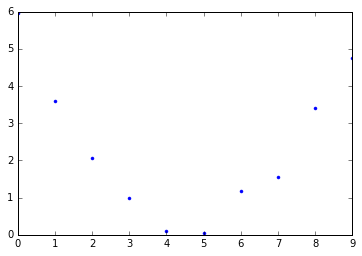

In [16]:
testmid.vecs = np.zeros((testmid.ndim,th.data.shape[-1]))
testmid.vecs[0,0] = 1
info, pv, pvt = testmid.info_and_dists(vecs=testmid.vecs,neg=False)
print(info)
plt.plot(pvt/pv,'b.')

In [18]:
testresults = testmid.optimize('GA',rate=1,maxiter=10)

Info             Gradient norm
0.825502656921  8.76184683933
1.48163185188  0.932176054993
2.37887847189  1.34128278403
3.28687591034  3.01781996501
2.96190414334  2.05104030217
3.35007324111  3.05653040972
3.07614006408  1.93078676971
3.57215609899  1.5230620622
3.77409966205  0.4861086493
3.95553105532  0.383217973799
3.95553105532  0.383217973799
Did not converge to desired precision.


3.86094033142


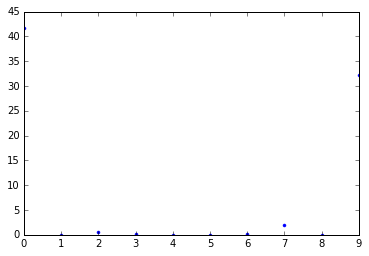

In [19]:
info, pv, pvt = testmid.info_and_dists(vecs=testmid.vecs,neg=False)
print(info)
plt.plot(pvt/pv,'b.')

In [20]:
testmid.vecs

array([[  2.96769213e+00,  -1.23150790e-01,   2.85685053e-01,
         -9.04555741e-02,  -2.14208559e-01,  -3.95402026e-01,
          2.64793780e-01,  -1.11125300e-02,   4.21721328e-01,
         -1.73908540e-01,  -4.12968612e-01,  -3.61054049e-01,
          3.47379458e-01,   2.45670354e-01,  -9.93695743e-02,
          1.24441823e-01,   2.80959538e-01,   1.94143572e-02,
         -8.87745530e-01,   2.27532330e-01,  -1.10801971e-01,
          3.57040882e-02,  -2.96717294e-01,   4.22735136e-01,
         -3.15664616e-01,   3.78908274e-01,  -2.16875379e-01,
         -7.35871233e-01,   6.22985776e-01,   7.02860161e-01,
          2.35896016e-01,   2.11998237e-01,  -6.61687903e-01,
         -3.67188207e-01,  -6.62287736e-01,  -2.12152887e-01,
         -6.37363144e-02,  -1.17332293e-01,   4.70945477e-01,
          4.01152324e-01,  -5.26126022e-02,   2.55955321e-01,
         -5.37813978e-03,  -4.63510070e-01,  -2.08077756e-01,
         -3.45962356e-01,   2.87432477e-01,  -1.94368863e-01,
        

In [131]:
testmid.binbounds

array([[ -1.03226161e+00,  -7.74432835e-01,  -5.16604060e-01,
         -2.58775286e-01,  -9.46510854e-04,   2.56882264e-01,
          5.14711039e-01,   7.72539813e-01,   1.03036859e+00],
       [ -1.03342184e+00,  -7.75080982e-01,  -5.16740126e-01,
         -2.58399271e-01,  -5.84148720e-05,   2.58282441e-01,
          5.16623297e-01,   7.74964152e-01,   1.03330501e+00]])

In [10]:
info, grad = testmid.info_grad(testmid.v,neg=False)

In [11]:
grad

array([ -3.19422677e-03,   4.53008849e-04,  -8.95012687e-05,
         5.58564394e-05,  -5.67877378e-05])

In [15]:
grad.dot(testmid.v)

NameError: name 'grad' is not defined

In [15]:
v = np.array([.4,.2,.2,.2,.2])
grad = np.zeros(5)
epsilon = .01
info, supposedgrad = testmid.info_grad(v, neg=False)
for direc in range(5):
    delta = np.zeros(5)
    delta[direc] = epsilon
    newinfo, _ =  testmid.info_grad(v+delta, neg=False)
    grad[direc] = (newinfo-info)/epsilon
print(supposedgrad)
print(grad)

[ 0.14781714 -0.06893542 -0.06967218 -0.06996106 -0.06930162]
[ 0.20287896 -0.09543404 -0.10106793 -0.09942686 -0.11212613]


In [16]:
info, pv, pvt = testmid.info_and_dists()
abscissa = np.arange(15)
plt.plot(abscissa, pv, 'b.', abscissa, pvt, 'r.', abscissa, pvt/pv, 'g.')
plt.show()

In [22]:
np.log2(th.get_nstim()/th.spiketrain.sum())

2.4119016054862952

In [17]:
alltheinfo = testmid.info(th.truerf, neg=False)
print(alltheinfo)

1.31991421587


In [27]:
expbias = (th.get_nstim()/th.spiketrain.sum())/(2*np.log(2))
print(expbias)

3.83883347406


In [5]:
withbfgs = testmid.optimize('BFGS')

         Current function value: -1.320318
         Iterations: 5
         Function evaluations: 56
         Gradient evaluations: 44
Desired error not necessarily achieved due to precision loss.


In [6]:
withbfgs.x

array([ 2.52087593,  0.0077204 , -0.02900514, -0.00861167, -0.00476075])

In [8]:
import time 
init = time.clock()
info = testmid.info()
justinfotime = time.clock() - init
info, grad = testmid.info_grad(testmid.v)
bothtime = time.clock() - justinfotime - init
print(justinfotime)
print(bothtime)

5.140145385436469
8.321890010674267
